In [1]:
#import Dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from scipy.stats import linregress

In [2]:
#Read data from csv file created by zipcode_build_df.ipynb notebook
#This will be the source for all analysis in this notebook
zipcode_main_df = pd.read_csv('data/zip_code_data_combined.csv')
del zipcode_main_df["Unnamed: 0"]
zipcode_main_df.head()

,zip_code,complaint_count,crime_reports,median_household_income($),population_below_poverty_level(%),unemployment(%),total_population,male(%),female(%),renters(%)
0,78745,31381,2108.0,49243.0,16.0,7.0,55614.0,50.010789,49.989211,54.0
1,78704,29674,2380.0,50248.0,21.0,7.0,42117.0,50.480803,49.519197,65.0
2,78702,25203,1497.0,34734.0,33.0,11.0,21334.0,51.031218,48.968782,54.0
3,78744,22108,1807.0,41056.0,26.0,9.0,42820.0,50.586175,49.413825,54.0
4,78758,21741,2281.0,41792.0,24.0,10.0,44072.0,52.219096,47.780904,71.0


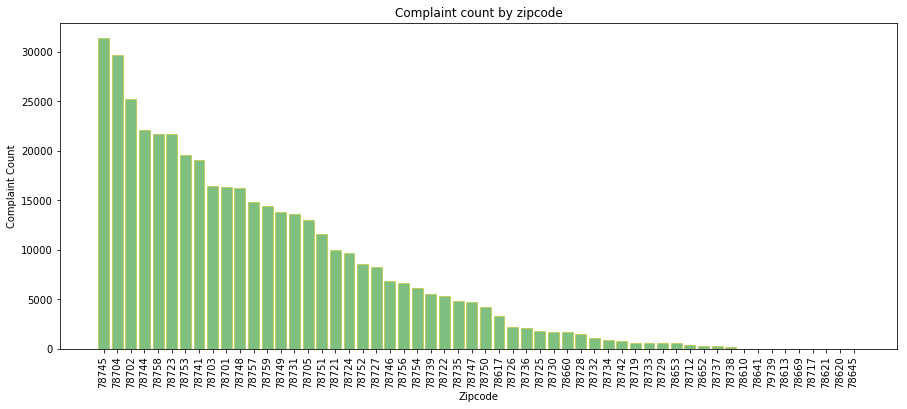

In [3]:
#plot complaint count by zipcode

# Create the ticks for bar chart's x axis
plt.figure(figsize=(15,6))
x_axis = np.arange(len(zipcode_main_df["zip_code"]))
tick_locations = [value + 0.4 for value in x_axis]
plt.xticks(tick_locations, zipcode_main_df["zip_code"], rotation="vertical")

plt.bar(x_axis, zipcode_main_df["complaint_count"], alpha=0.5, align="edge", color = "green", edgecolor = "y")

plt.xlabel("Zipcode")
plt.ylabel("Complaint Count")
plt.title("Complaint count by zipcode")

fig1 = plt.gcf()
plt.show()
fig1.savefig('images/Complaint_zip.png', dpi=200)

The top-3 zipcodes based on complaint counts are
1. 78745 (Sunset Valley)
2. 78704 (Zilker/Barton hills)
3. 78702 (Central-East Austin)

### Population Analysis
Zip-codes with larger population will have more number of complaints.

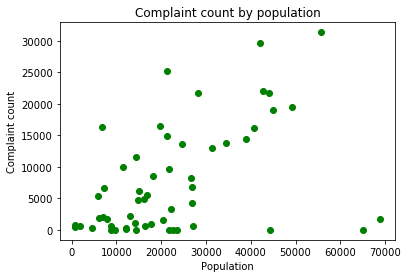

In [4]:
#complaint count vs population
plt.scatter (zipcode_main_df["total_population"], zipcode_main_df["complaint_count"], color = "green", edgecolor = "g")
                               
plt.xlabel("Population")
plt.ylabel("Complaint count")
plt.title("Complaint count by population")

fig1 = plt.gcf()
plt.show()
fig1.savefig('images/Complaint_population.png', dpi=200)

In order to remove the effect of population on complaint count, it is useful to calculate & plot per-capita complaints by zipcode

In [5]:
#calculate per-capita complaint count by zipcode
zipcode_main_df["per_capita_complaint"] = zipcode_main_df["complaint_count"]/zipcode_main_df["total_population"]
zipcode_main_df.head()

,zip_code,complaint_count,crime_reports,median_household_income($),population_below_poverty_level(%),unemployment(%),total_population,male(%),female(%),renters(%),per_capita_complaint
0,78745,31381,2108.0,49243.0,16.0,7.0,55614.0,50.010789,49.989211,54.0,0.564264
1,78704,29674,2380.0,50248.0,21.0,7.0,42117.0,50.480803,49.519197,65.0,0.704561
2,78702,25203,1497.0,34734.0,33.0,11.0,21334.0,51.031218,48.968782,54.0,1.181354
3,78744,22108,1807.0,41056.0,26.0,9.0,42820.0,50.586175,49.413825,54.0,0.516301
4,78758,21741,2281.0,41792.0,24.0,10.0,44072.0,52.219096,47.780904,71.0,0.493306


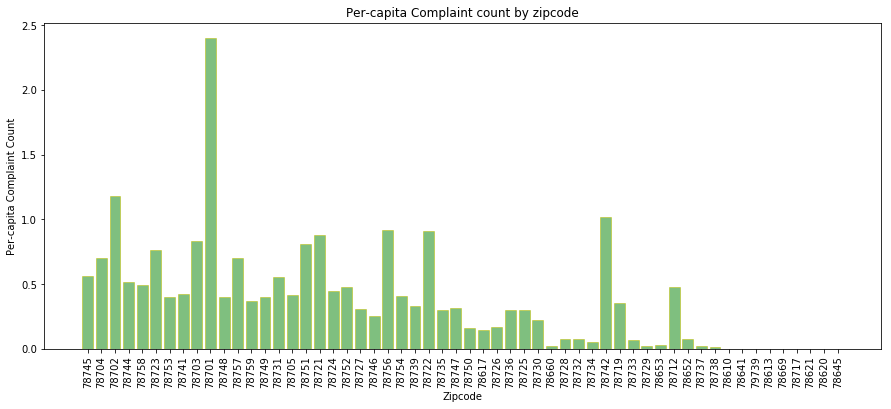

In [6]:
#plot per-capita complaint count by zipcode

# Create the ticks for bar chart's x axis
plt.figure(figsize=(15,6))
x_axis = np.arange(len(zipcode_main_df["zip_code"]))
tick_locations = [value + 0.4 for value in x_axis]
plt.xticks(tick_locations, zipcode_main_df["zip_code"], rotation="vertical")

plt.bar(x_axis, zipcode_main_df["per_capita_complaint"], alpha=0.5, align="edge", color = "green", edgecolor = "y")

plt.xlabel("Zipcode")
plt.ylabel("Per-capita Complaint Count")
plt.title("Per-capita Complaint count by zipcode")

fig1 = plt.gcf()
plt.show()
fig1.savefig('images/Per-capita_complaint_zip.png', dpi=200)

The top-3 zipcodes based on per-capita complaint counts are
1. 78701 (Downtown)
2. 78702 (Central-East Austin)
3. 78742 

In [7]:
# Create data-frame for zipcodes with populations between 20K-30K
# This will be used later for analysis of zip-codes with similar population
zipcode_20k_to_30k = zipcode_main_df[zipcode_main_df["total_population"].between(20000, 30000, inclusive=True)]

### Household income analysis
Analyse the complaint count per zip-code based on Median household income

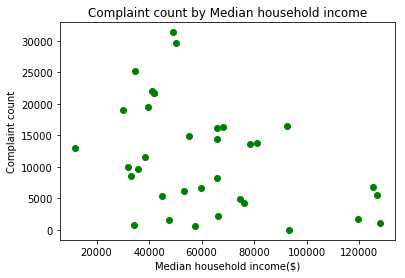

In [8]:
#complaint count vs income
plt.scatter (zipcode_main_df["median_household_income($)"], zipcode_main_df["complaint_count"],color = "green", edgecolor = "g")
plt.xlabel("Median household income($)")
plt.ylabel("Complaint count")
plt.title("Complaint count by Median household income")

fig1 = plt.gcf()
plt.show()
fig1.savefig('images/Complaint_median_income.png', dpi=200)

Scatter plot does not seem to be a good way to represent the relationship between complaint counts & median household income.
A better way is to create 5 income categories & represent complaint count by a bar chart

In [9]:
#bin by household income
#define bins & label. Use pd.cut to bin on school_sumry_df dataframe
bins = [0, 20000, 40000, 60000, 80000, 180000]
bin_labels = [" <20K","20K-40K","40K-60K","60K-80K", ">80K",]
zipcode_main_df["median_household_income_bins"] = pd.cut(zipcode_main_df["median_household_income($)"], 
                                                         bins, right = False, labels = bin_labels)

income_bar = pd.DataFrame(zipcode_main_df.groupby("median_household_income_bins")["complaint_count"].mean())
income_bar = income_bar.reset_index()
income_bar

,median_household_income_bins,complaint_count
0,<20K,12989.000000
1,20K-40K,13090.250000
2,40K-60K,14705.000000
3,60K-80K,10025.500000
4,>80K,6510.142857


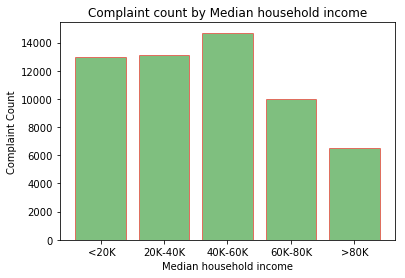

In [10]:
# Create the ticks for our bar chart's x axis
#plt.figure(figsize=(20,3))
x_axis = np.arange(len(income_bar["median_household_income_bins"]))
tick_locations = [value + 0.4 for value in x_axis]
plt.xticks(tick_locations, income_bar["median_household_income_bins"])

plt.bar(x_axis, income_bar["complaint_count"], alpha=0.5, align="edge",color = "green", edgecolor = "r")

plt.xlabel("Median household income")
plt.ylabel("Complaint Count")
plt.title("Complaint count by Median household income")

fig1 = plt.gcf()
plt.show()
fig1.savefig('images/Complaint_median_income_bins.png', dpi=200)

### Poverty line

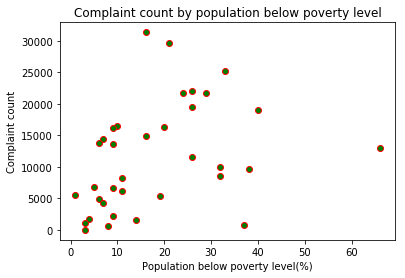

In [11]:
#complaint count vs population below poverty line
plt.scatter (zipcode_main_df["population_below_poverty_level(%)"], zipcode_main_df["complaint_count"],color = "green", edgecolor = "r")
plt.xlabel("Population below poverty level(%)")
plt.ylabel("Complaint count")
plt.title("Complaint count by population below poverty level")

fig1 = plt.gcf()
plt.show()
fig1.savefig('images/Complaint_poverty.png', dpi=200)

### Crime
This analysis is based on a 2016 Annual Crime report data. There were zipcode mentioned for each reported crime. I grouped the crime reports by zip-code to get total crime reports per zip-code. I then used this data to see if neighbourhoods that are pro-active in reporting problems have lower crime rates

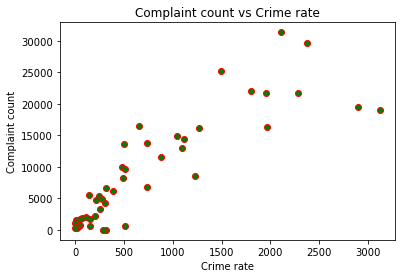

In [12]:
#complaint count vs crime rate
plt.scatter (zipcode_main_df["crime_reports"], zipcode_main_df["complaint_count"], color = "green", edgecolor = "r")
plt.xlabel("Crime rate")
plt.ylabel("Complaint count")
plt.title("Complaint count vs Crime rate")

fig1 = plt.gcf()
plt.show()
fig1.savefig('images/Complaint_crime.png', dpi=200)

In [13]:
#Regression analysis(best fit)
crime = zipcode_main_df.loc[:,"crime_reports"]
complaint = zipcode_main_df.loc[:,"complaint_count"]

#use mask to remove NaN
mask = ~np.isnan(crime) & ~np.isnan(complaint)
slope, intercept, r_value, p_value,_ = linregress(crime[mask], complaint[mask])
fit = slope * crime[mask] + intercept

In [22]:
print('{0:.5f}'.format(r_value**2), '{0:.7f}'.format(p_value))

0.77110 0.0001720


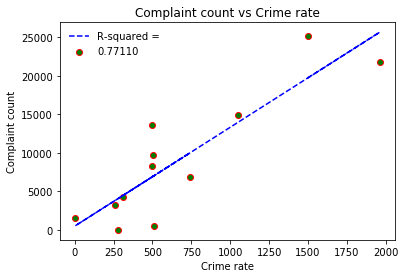

In [23]:
#plot crime reports vs complaint count
plt.scatter(crime[mask], complaint[mask], color='green', edgecolor='r')
plt.plot(crime[mask], fit, color='blue', linestyle='dashed')
plt.xlabel("Crime rate")
plt.ylabel("Complaint count")
plt.title("Complaint count vs Crime rate")
plt.legend((f'R-squared = ','{0:.5f}'.format(r_value**2)),loc='upper left', frameon=False)
fig1 = plt.gcf()
plt.show()
fig1.savefig('images/Complaint_crime_regression.png', dpi=200)

It looks like being involved & vocal about their surroundings isn't helping. There is a fairly linear relationship between crime rate & complaint count. In order to discount the effect of population, I looked at only zipcodes with population between 20-30K

In [24]:
#Regression analysis(best fit) when only looking at zip-code with population 20K-30K
crime = zipcode_20k_to_30k.loc[:,"crime_reports"]
complaint = zipcode_20k_to_30k.loc[:,"complaint_count"]

#use mask to remove NaN
mask = ~np.isnan(crime) & ~np.isnan(complaint)
slope, intercept, r_value, p_value,_ = linregress(crime[mask], complaint[mask])
fit = slope * crime[mask] + intercept

In [25]:
print('{0:.5f}'.format(p_value), '{0:.5f}'.format(r_value**2))

0.00017 0.77110


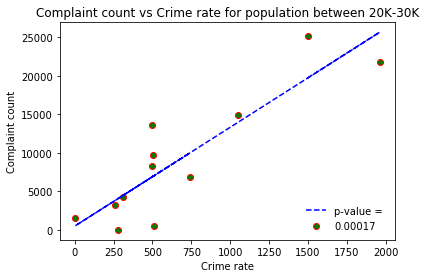

In [18]:
#plot crime reports vs complaint count for zip-codes with population 20K-30K
plt.scatter(crime[mask], complaint[mask], color='green', edgecolor='r')
plt.plot(crime[mask], fit, color='blue', linestyle='dashed')
plt.xlabel("Crime rate")
plt.ylabel("Complaint count")
plt.title("Complaint count vs Crime rate for population between 20K-30K")
plt.legend((f'p-value = ','{0:.5f}'.format(p_value)),loc='lower right', frameon=False)
fig1 = plt.gcf()
plt.show()
fig1.savefig('images/Complaint_20K_30K.png', dpi=200)

The linear relation still holds even when considering zipcode with similar population.The higher 311 complaint numbers seems to be an indication of systemic problems in the neighbourhood. Higher crime rate might be one of the results of it.

### Renters and Home-owners
I obtained the percentage of renters in zip-code from city-data.com to see how renters compare with home-owners in caring about their neighbourhood.

In [19]:
#bin by renters & home-owners
#define bins & label. Use pd.cut to bin on school_sumry_df dataframe
bins = [0, 50, 100]
bin_labels = ["Home owners","Renters"]
zipcode_main_df["Majority"] = pd.cut(zipcode_main_df["renters(%)"], bins, right = False, labels = bin_labels)
zipcode_main_df.head()

,zip_code,complaint_count,crime_reports,median_household_income($),population_below_poverty_level(%),unemployment(%),total_population,male(%),female(%),renters(%),per_capita_complaint,median_household_income_bins,Majority
0,78745,31381,2108.0,49243.0,16.0,7.0,55614.0,50.010789,49.989211,54.0,0.564264,40K-60K,Renters
1,78704,29674,2380.0,50248.0,21.0,7.0,42117.0,50.480803,49.519197,65.0,0.704561,40K-60K,Renters
2,78702,25203,1497.0,34734.0,33.0,11.0,21334.0,51.031218,48.968782,54.0,1.181354,20K-40K,Renters
3,78744,22108,1807.0,41056.0,26.0,9.0,42820.0,50.586175,49.413825,54.0,0.516301,40K-60K,Renters
4,78758,21741,2281.0,41792.0,24.0,10.0,44072.0,52.219096,47.780904,71.0,0.493306,40K-60K,Renters


In [20]:
majority_bar = pd.DataFrame(zipcode_main_df.groupby("Majority")["complaint_count"].mean())
majority_bar = majority_bar.reset_index()
majority_bar

,Majority,complaint_count
0,Home owners,4019.911765
1,Renters,14287.500000


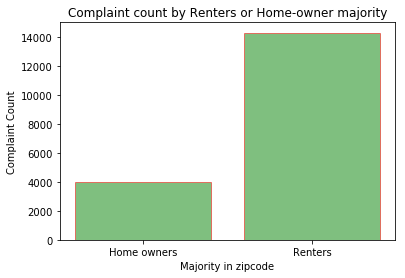

In [21]:
# Create the ticks for our bar chart's x axis

x_axis = np.arange(len(majority_bar["Majority"]))
tick_locations = [value + 0.4 for value in x_axis]
plt.xticks(tick_locations, majority_bar["Majority"])

plt.bar(x_axis, majority_bar["complaint_count"], alpha=0.5, align="edge", color = "green", edgecolor = "r")

plt.xlabel("Majority in zipcode")
plt.ylabel("Complaint Count")
plt.title("Complaint count by Renters or Home-owner majority")

plt.show()